In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading Data
df= pd.read_excel(r'C:\Users\Neeraj\Desktop\Datasets\Raisin_Dataset.xlsx')

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.shape

(900, 8)

In [5]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

no Null values found in data

In [6]:
#checking tagget column how much varience is there
df['Class'].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [7]:
#checking the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [8]:
#Converting Categorical data to Int by Lebeleconder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Class']= label_encoder.fit_transform(df['Class'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int32  
dtypes: float64(5), int32(1), int64(2)
memory usage: 52.9 KB


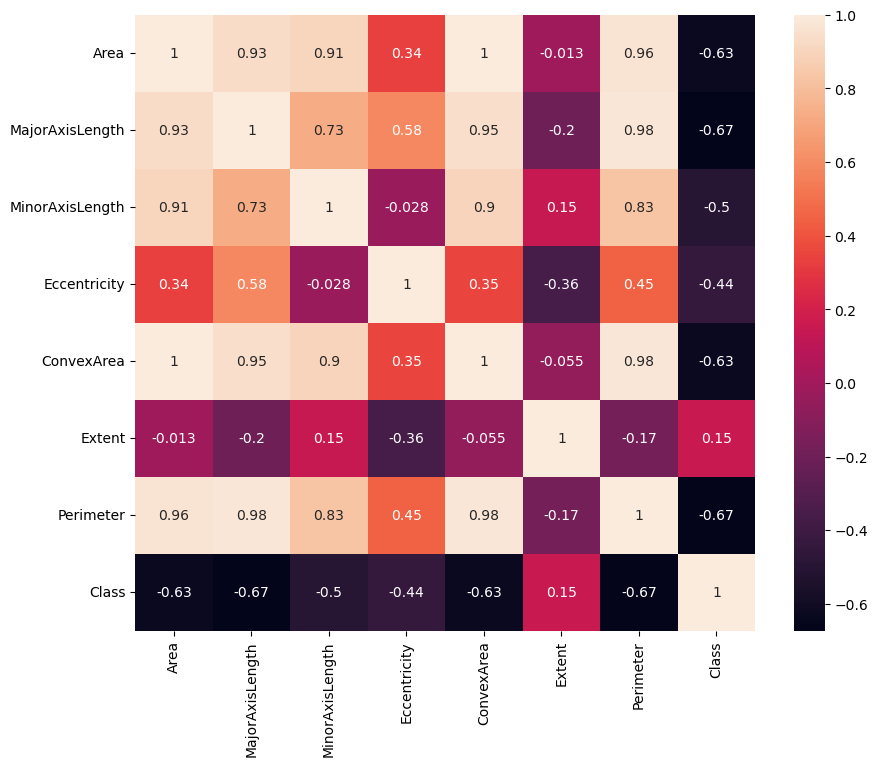

In [10]:
#checking the Correlagtion b/w defferent features of data
import matplotlib.pyplot as plt
import seaborn as sns
Corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(Corr, annot=True)
plt.show()

In [11]:
#deviding the data in X and v variable for spliting the dataset
x=df.drop(['Class'],axis=1)
y=df.Class

# XGBClassifier

In [12]:
#By use of XGboost classifiers we can check fpr best features and Parameters
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(x,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

[0.05994039 0.5571977  0.04529629 0.07494503 0.07011327 0.06203638
 0.13047098]


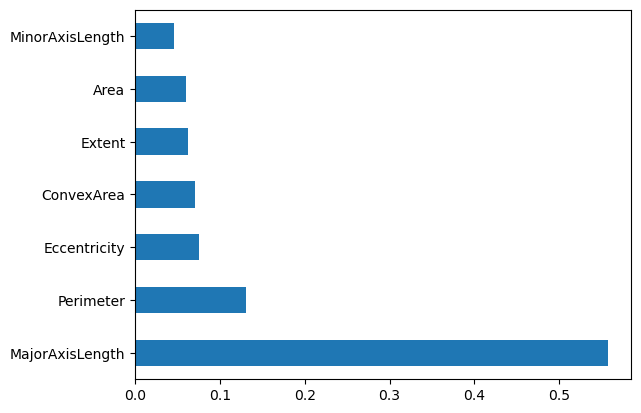

<Figure size 800x600 with 0 Axes>

In [13]:
#ploting the XGbost result in brah for better understanding
print(model.feature_importances_) 
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [111]:
abc = AdaBoostClassifier(n_estimators=100, learning_rate=0.30, random_state=0)

In [112]:
model1 = abc.fit(X_train, y_train)

In [113]:
y_pred = model1.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))


AdaBoost Classifier Model Accuracy: 0.8722222222222222


In [46]:
from sklearn.svm import SVC

In [47]:
svc=SVC(probability=True, kernel='linear')

In [116]:
abc =AdaBoostClassifier(n_estimators=100, base_estimator=svc,learning_rate=0.30, random_state=0)

In [117]:
model2 = abc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
print("Model Accuracy with SVC Base Estimator:",accuracy_score(y_test, y_pred))

In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0)
model2 = tree.DecisionTreeClassifier(random_state=0)
model3=RandomForestClassifier(random_state=0)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('rf',model3)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8611111111111112

In [67]:
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2),('rf',model3)], voting='soft')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8555555555555555

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.3,random_state=0)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8555555555555555

In [85]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=0,learning_rate=0.3)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8611111111111112

In [100]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
model = LGBMClassifier()
model.fit(X_train, y_train)
 
# Predicting the Target variable
pred = model.predict(X_test)
print(pred)
accuracy = model.score(X_test, y_test)
print(accuracy)

[0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1
 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1]
0.8444444444444444


In [103]:
model = LGBMClassifier(learning_rate=0.3,random_state=0)
model.fit(X_train, y_train)
 
# Predicting the Target variable
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.8666666666666667


In [104]:
from sklearn.ensemble import BaggingClassifier

In [105]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

base_estimator - This represents the algorithm used as the base/weak learners. 
We will use the DecisionTreeClassifier algorithm as our weak/base learners.

n_estimators - This represents the number of weak learners used. 
We will use 100 decision trees to build the bagging model.

bootstrap - Allows for resampling of the training dataset without replacement.

oob_score - Used to compute the model’s accuracy score after training.



In [107]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [108]:
bag_model.oob_score_

0.8541666666666666

In [109]:
bag_model.score(X_test, y_test)

0.85